<a href="https://colab.research.google.com/github/jscortesg/Uniandes-MetodosComputacionales-2022-01/blob/main/Taller3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
from numpy.fft import fft, ifft

%matplotlib inline

#Primer Ejercicio

\begin{equation}
V(r,\theta) = \frac{aV_{0}}{r} + \frac{(r^{3} - a^{3})k\cos\theta}{3\epsilon_{0}r^{2}}
\end{equation}

Gradiente en coordenadas esféricas:

\begin{equation}
\nabla = \frac{\partial}{\partial r}\hat{r} + \frac{1}{r}\frac{\partial}{\partial \theta}\hat{\theta} + \frac{1}{r\sin\theta}\frac{\partial}{\partial \varphi}\hat{\varphi}  
\end{equation}

Campo eléctrico radial:

\begin{equation}
E_{r} = -\frac{\partial V}{\partial r}
\end{equation}

Campo eléctrico angular (en $\theta$):

\begin{equation}
E_{\theta} = -\frac{1}{r}\frac{\partial V}{\partial \theta}
\end{equation}

In [ ]:
a = 0.5
b = 0.8
V0 = 40
k = 1.5*pow(10,-9)
e0 = 8.85*pow(10,-12)

def Potv(r, theta):
  return (a*V0)/(r) + ((pow(r,3) - pow(a,3))*k*np.cos(theta))/(3*e0*pow(r,2))

In [ ]:
def Er(r, theta, h):
  return -(Potv(r + h/2, theta) - Potv(r - h/2, theta))/h

def Etheta(r, theta, h):
  return -(Potv(r, theta + h/2) - Potv(r, theta - h/2))/(h*r)

Text(0, 0.5, '$E_{\\Theta}$ (N/C)')

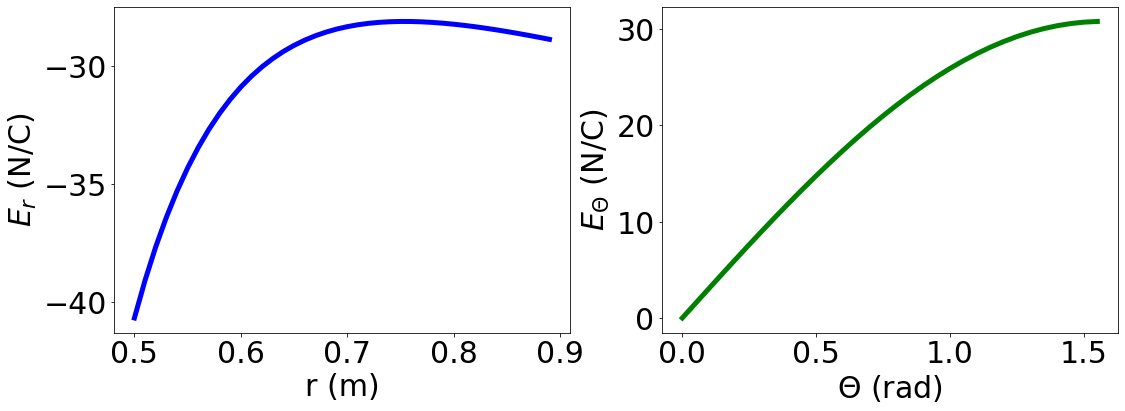

In [ ]:
r_int = np.arange(a, b+0.1, 0.01)
theta_int = np.arange(0, np.pi/2, 0.05)

plt.figure(figsize = (18, 6))
plt.rcParams['font.size'] = '30'
plt.subplot(121)
plt.plot(r_int, Er(r_int, np.pi/4, 0.1), '-b',linewidth=5.0)
plt.xlabel('r (m)')
plt.ylabel('$E_{r}$ (N/C)')

plt.subplot(122)
plt.plot(theta_int, Etheta(0.65, theta_int, 0.1), '-g',linewidth=5.0)
plt.xlabel('$\Theta$ (rad)')
plt.ylabel('$E_{\Theta}$ (N/C)')

En coordenadas polares:

\begin{align}
r &= \sqrt{x^{2} + y^{2} + z^{2}} \\
z &= r\cos\theta
\end{align}

Entonces,

\begin{align}
V(r,\theta) &= \frac{aV_{0}}{r} + \frac{(r^{3} - a^{3})k\cos\theta}{3\epsilon_{0}r^{2}} \\
&= \frac{aV_{0}}{r} + \frac{(r^{3} - a^{3})k*r\cos\theta}{3\epsilon_{0}r^{3}} \\
& = \frac{aV_{0}}{r} + \frac{k}{3\epsilon_{0}}r\cos\theta - \frac{a^{3}k}{3\epsilon_{0}r^{3}}r\cos\theta
\end{align}

De este modo,

\begin{equation}
V(x,y,z) = \frac{aV_{0}}{\sqrt{x^{2} + y^{2} + z^{2}}} + \frac{k}{3\epsilon_{0}}z - \frac{a^{3}k}{3\epsilon_{0}}\frac{z}{(x^{2} + y^{2} + z^{2})^{3/2}}
\end{equation}

In [ ]:
def Pot_rec(x,y,z):
  return (a*V0)/(np.sqrt(pow(x,2) + pow(y,2) + pow(z,2))) 
  + (k*z)/(3*e0) - ((pow(a,3)*k)/(3*e0))*(z/pow(pow(x,2) + pow(y,2) + pow(z,2),3/2))

In [ ]:
def Ex(x, y, z, h):
  return -(Pot_rec(x + h/2,y,z) - Pot_rec(x - h/2,y,z))/h

def Ey(x, y, z, h):
  return -(Pot_rec(x,y + h/2,z) - Pot_rec(x,y - h/2,z))/h

def Ez(x, y, z, h):
  return -(Pot_rec(x,y,z + h/2) - Pot_rec(x,y,z - h/2))/h

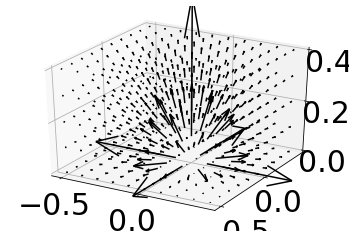

In [ ]:
plt.figure()
ax = plt.gca(projection='3d')

x, y, z = np.meshgrid(np.arange(-0.5, 0.5, 0.1),
                      np.arange(-0.5, 0.5, 0.1),
                      np.arange(0, 0.5, 0.1))

u = Ex(x, y, z, 0.1)
v = Ey(x, y, z, 0.1)
w = Ez(x, y, z, 0.1)

ax.quiver(x, y, z, u, v, w, length=2*pow(10,-4), color = 'black')

plt.show()

#Segundo Ejercicio

Fuerza restauradora lineal + fuerza anarmónica:

\begin{equation}
F = -2x + 0.4x^{3}.
\end{equation}

Energía potencial:

\begin{align}
F &= -\frac{dU}{dx} = -2x + 0.4x^{3} \\
U(x) &= \int_{U_{0}}^{U}dU = -\int_{x_0}^{x}(-2x + 0.4x^{3})\,dx \\
U(x) - U_{0} &= \int_{x_{0}}^{x}(2x-0.4x^{3})\,dx\\
U(x) &= U_{0} + \int_{x_{0}}^{x}(2x-0.4x^{3})\,dx.
\end{align}

In [ ]:
def U(x,x0,U0):
  N = 101

  h = (x-x0)/(N-1)

  x_i = np.linspace(x0,x,N)

  Fx = 2*x_i - 0.4*pow(x_i,3)

  return U0 + (h/3)*(Fx[0] + 2*sum(Fx[:N-2:2]) + 4*sum(Fx[1:N-1:2]) + Fx[N-1])

In [ ]:
x1_int = np.arange(-4,4.1,0.1)

listU1 = [U(x,0,0) for x in x1_int]

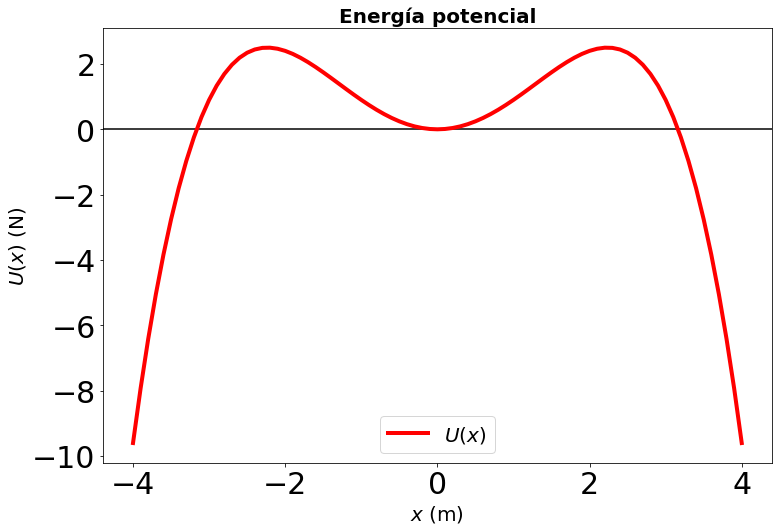

In [ ]:
fig, ax = plt.subplots(figsize = (12, 8))

plt.rcParams['font.size'] = '30'

ax.set_title('Energía potencial', fontweight="bold", size=20)
ax.set_ylabel('$U(x)$ (N)', fontsize = 20.0) 
ax.set_xlabel('$x$ (m)', fontsize = 20.0)
ax.axhline(0, color='black')
ax.plot(x1_int, listU1, '-r', label = '$U(x)$', linewidth=4)
leg = ax.legend(prop={"size":20})

In [ ]:
def Fcero():
  
  listder = []

  for i in range(0,len(listU1)-1):
    derv = (listU1[i + 1] - listU1[i])/(x1_int[i+1] - x1_int[i])

    if derv < pow(10,-1) and derv > -0.9*pow(10,-1):
      listder.append(x1_int[i])

  return listder

In [ ]:
Fcero()

[-2.2999999999999985, 3.552713678800501e-15, 2.2000000000000055]

In [ ]:
Fx = lambda x: -2*x + 0.4*pow(x,3)

def derFx(Fx,Fcero,h):

  for x in Fcero():
    derF = (Fx(x + h/2) - Fx(x - h/2))/h
    if derF >0:
      print("Equilibrio inestable en ", x)

In [ ]:
derFx(Fx,Fcero,0.1)

Equilibrio inestable en  -2.2999999999999985
Equilibrio inestable en  2.2000000000000055


#Tercer Ejercicio

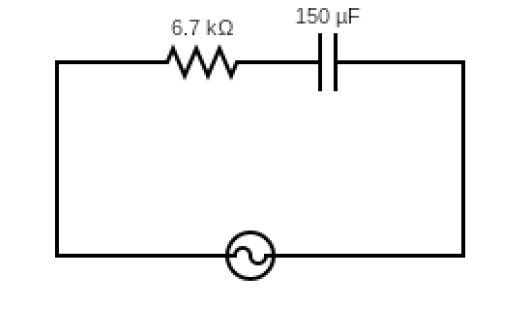

Voltaje de la fuente:

\begin{equation}
\Delta V(t) =
\begin{cases}
1, & 0\leq t< 10\tau \\
0, & 10\tau\leq t <20\tau
\end{cases}
\end{equation}

$0\leq t< 10\tau$: Carga.

\begin{equation}
Q(t) = Q_{0}(1 - e^{-t/\tau}).
\end{equation}

$10\tau\leq t <20\tau$: Descarga.

\begin{equation}
Q(t) = Q_{0}e^{-t/\tau}.
\end{equation}

Carga inicial $Q_{0}$: $Q_{0}=C\Delta V_{max}$, con $\Delta V_{max} = \text{1 V}$.

Tiempo característico del circuito RC: $\tau = RC$.

In [ ]:
Vmax = 1
C = 150*pow(10,-6)
R = 6.7*pow(10,3)
tau = R*C
Q0 = Vmax*C

t1 = np.arange(0,10*tau,tau/100)
t2 = np.arange(10*tau,20*tau,tau/100)

In [ ]:
tau

1.005

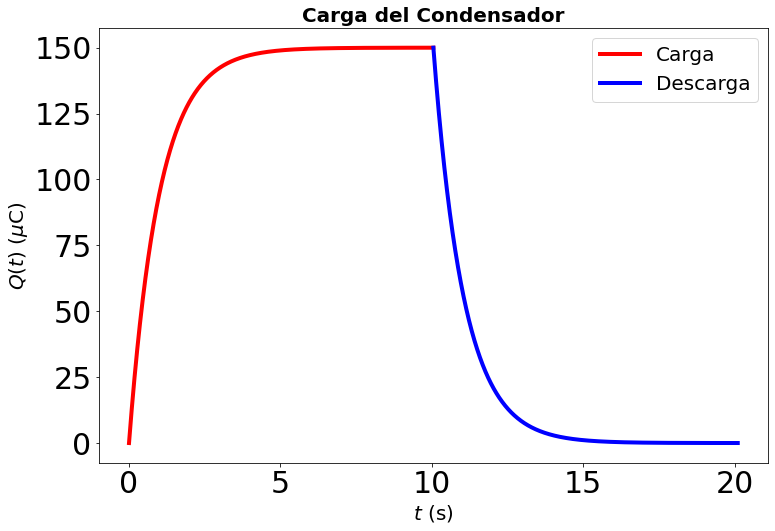

In [ ]:
fig, ax = plt.subplots(figsize = (12, 8))

plt.rcParams['font.size'] = '30'

ax.set_title('Carga del Condensador', fontweight="bold", size=20)
ax.set_ylabel('$Q(t)$ ($\mu$C)', fontsize = 20.0) 
ax.set_xlabel('$t$ (s)', fontsize = 20.0)
ax.plot(t1, Q0*(1-np.exp(-t1/tau))/pow(10,-6), '-r', label = 'Carga', linewidth=4)
ax.plot(t2, Q0*np.exp(-t1/tau)/pow(10,-6), '-b', label = 'Descarga', linewidth=4)
leg = ax.legend(prop={"size":20})

In [ ]:
Y1 = Q0*(1-np.exp(-t1/tau))
Y2 = Q0*np.exp(-t1/tau)

type(Y1)

numpy.ndarray

In [ ]:
YT = np.concatenate((Y1, Y2), axis=0)

In [ ]:
math.sqrt(2*np.pi)

2.5066282746310002

In [ ]:
np.sqrt(2*np.pi)

2.5066282746310002

In [ ]:
YTft = fft(YT)/math.sqrt(2*np.pi)
YTft1 = np.fft.fft(YT)/np.sqrt(2*np.pi)
N = len(YTft)
n = np.arange(N)
sr = 200
T = N/sr
freq = n/T 

In [ ]:
len(YTft), len(YTft1)

(2002, 2002)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


(0.0, 0.04)

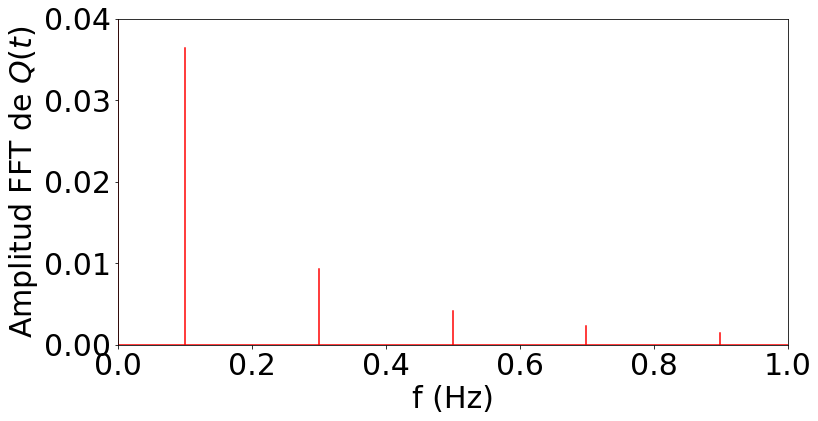

In [ ]:
plt.figure(figsize = (12, 6))

plt.stem(freq, np.abs(YTft), 'r', \
         markerfmt=" ", basefmt="-r")
plt.xlabel('f (Hz)')
plt.ylabel('Amplitud FFT de $Q(t)$')
plt.xlim(0, 1)
plt.ylim(0, 0.04)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


(0.0, 1.0)

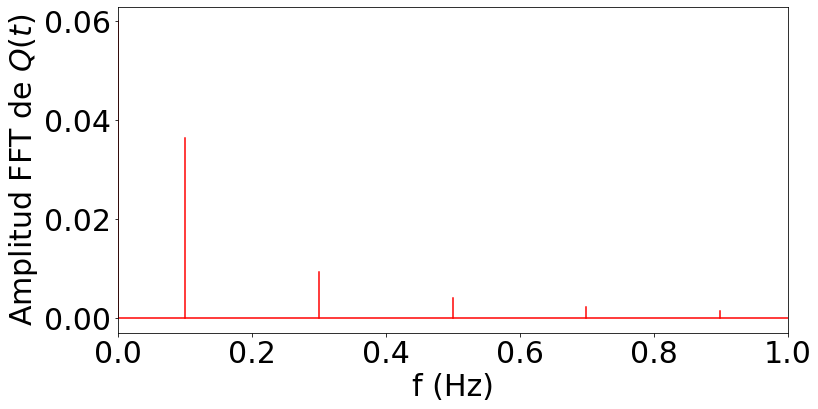

In [ ]:
plt.figure(figsize = (12, 6))

plt.stem(freq, np.abs(YTft1), 'r', \
         markerfmt=" ", basefmt="-r")
plt.xlabel('f (Hz)')
plt.ylabel('Amplitud FFT de $Q(t)$')
plt.xlim(0, 1)
#plt.ylim(0, 0.04)